<a href="https://colab.research.google.com/github/mfon-uwa/Hackathons/blob/main/StressPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

Mounting my google drive so I can get access to the csv files

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
import pandas as pd 
import numpy  as np 

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Mounted at /content/drive


**Importing the training dataset** 

In [148]:
train_heart_rate_data = pd.read_csv('/content/drive/MyDrive/Hackathons/Train/heart_rate_non_linear_features_train.csv')
train_time_data = pd.read_csv('/content/drive/MyDrive/Hackathons/Train/time_domain_features_train.csv')
train_frequency_data = pd.read_csv('/content/drive/MyDrive/Hackathons/Train/frequency_domain_features_train.csv')

In [ ]:
train_frequency_data.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [ ]:
train_heart_rate_data.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [ ]:
train_time_data.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [149]:
print(train_heart_rate_data.shape)
print(train_time_data.shape)
print(train_frequency_data.shape)

(369289, 7)
(369289, 20)
(369289, 12)


# Train dataset: joining all the files(train_frequency_data, train_time_data and the train_heart_rate_data)

In [161]:
train_freq_time_dateset = pd.merge(train_frequency_data, train_time_data,  on='uuid')

In [ ]:
train_freq_time_dateset.shape

(369289, 31)

In [162]:
train_dateset = pd.merge(train_freq_time_dateset, train_heart_rate_data,  on='uuid') 

In [ ]:
# checking the shape of the combine training dataset
train_dateset.shape

(369289, 37)

In [ ]:
# checking for null
train_dateset.isnull().sum()

uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
dtype: int64

In [ ]:
train_dateset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               369289 non-null  object 
 1   VLF                369289 non-null  float64
 2   VLF_PCT            369289 non-null  float64
 3   LF                 369289 non-null  float64
 4   LF_PCT             369289 non-null  float64
 5   LF_NU              369289 non-null  float64
 6   HF                 369289 non-null  float64
 7   HF_PCT             369289 non-null  float64
 8   HF_NU              369289 non-null  float64
 9   TP                 369289 non-null  float64
 10  LF_HF              369289 non-null  float64
 11  HF_LF              369289 non-null  float64
 12  MEAN_RR            369289 non-null  float64
 13  MEDIAN_RR          369289 non-null  float64
 14  SDRR               369289 non-null  float64
 15  RMSSD              369289 non-null  float64
 16  SD

In [152]:
train_dateset.describe()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci,datasetId
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,3.692890e+05,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.0
mean,2199.580170,64.289242,946.530252,34.095182,95.566718,39.245603,1.615576,4.433282,3185.356025,115.977200,0.048506,846.650104,841.965890,109.352531,14.977498,14.976767,7.396597,73.941824,9.841143,0.866001,0.523235,0.041628,-1.756587e-06,-0.000465,0.018571,0.009701,0.009701,2.006817,0.523235,0.041628,10.593708,154.178997,2.062471,1.182292,2.0
std,1815.773422,16.774844,574.171780,16.040290,4.123365,45.398869,1.761073,4.123365,1923.227187,360.855129,0.049238,124.603984,132.321005,77.117025,4.120766,4.120768,5.143834,10.337453,8.195574,0.990189,1.790348,0.699522,1.630256e-04,0.000868,0.005455,0.003897,0.003897,0.375845,1.790348,0.699522,2.914795,109.170222,0.206999,0.062192,0.0
min,159.480176,19.031219,90.048557,2.165119,69.879083,0.061783,0.002150,0.012825,377.692795,2.319952,0.000128,547.492221,517.293295,27.233947,5.529742,5.529630,2.660381,48.737243,0.000000,0.000000,-1.894820,-2.136278,-1.233914e-03,-0.004425,0.008987,0.003220,0.003220,1.169342,-1.894820,-2.136278,3.911344,38.307745,0.434576,1.033984,2.0
25%,1001.189280,52.909877,545.449386,22.305936,93.645734,10.720312,0.346803,1.228054,1828.147788,14.737458,0.012433,760.228533,755.750735,64.205641,11.830959,11.830671,4.541896,66.715776,3.666667,0.000000,-0.352783,-0.359291,-7.281695e-05,-0.000917,0.014261,0.006984,0.006984,1.749801,-0.352783,-0.359291,8.368340,90.326864,2.032977,1.139929,2.0
50%,1667.903111,66.350237,782.716291,32.047025,96.643140,24.841938,1.039513,3.356860,2796.856587,28.789747,0.034735,822.951438,819.689595,82.608243,14.415918,14.415388,5.952112,74.217809,7.600000,0.466667,0.040736,-0.060966,-9.330777e-07,-0.000312,0.017318,0.008691,0.008691,1.934416,0.040736,-0.060966,10.196621,116.221063,2.134214,1.174293,2.0
75%,2654.121052,76.825032,1201.432256,44.647115,98.771946,45.272368,2.245115,6.354266,4052.260157,80.429614,0.067854,924.117422,916.821570,118.237002,17.927144,17.924839,7.919841,80.334937,13.333333,1.466667,0.722833,0.282417,6.911667e-05,0.000131,0.021827,0.011460,0.011460,2.221232,0.722833,0.282417,12.679005,166.764850,2.181929,1.223621,2.0
max,12617.977191,97.738848,3291.548112,77.928847,99.987175,364.486936,13.095664,30.120917,13390.684098,7796.443096,0.431043,1322.016957,1653.122250,563.486949,26.629477,26.629392,54.523950,113.752309,39.400000,5.466667,64.088107,6.777800,1.244098e-03,0.002095,0.036571,0.026955,0.026955,3.724134,64.088107,6.777800,18.836107,796.852945,2.234841,1.361219,2.0


In [ ]:
train_dateset.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'MEAN_RR', 'MEDIAN_RR', 'SDRR',
       'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'SD1',
       'SD2', 'sampen', 'higuci', 'datasetId', 'condition'],
      dtype='object')

**Importing the Testing dataset** 

In [186]:
test_heart_rate_data = pd.read_csv('/content/drive/MyDrive/Hackathons/Test/heart_rate_non_linear_features_test.csv')
test_time_data = pd.read_csv('/content/drive/MyDrive/Hackathons/Test/time_domain_features_test.csv')
test_frequency_data = pd.read_csv('/content/drive/MyDrive/Hackathons/Test/frequency_domain_features_test.csv')

In [187]:
print(test_heart_rate_data.shape)
print(test_time_data.shape)
print(test_frequency_data.shape)

(41033, 7)
(41033, 19)
(41033, 12)


In [155]:
test_heart_rate_data.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,8.347898,115.862444,2.209659,1.100715,2,time pressure
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,14.542096,77.118903,2.186132,1.290615,2,no stress
2,cb573d3a-c767-4556-b32e-ad8c08ded214,9.799336,125.044377,2.051571,1.226663,2,no stress
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,11.639185,302.029812,2.080910,1.085143,2,time pressure
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,7.266567,72.579248,2.068728,1.252547,2,interruption


# Test dataset: joining all the files(test_frequency_data, test_time_data and the heart_rate_data)

In [188]:
test_freq_time_dateset = pd.merge(test_frequency_data, test_time_data,  on='uuid')

In [189]:
test_dateset = pd.merge(test_freq_time_dateset, test_heart_rate_data,  on='uuid') 

In [158]:
test_dateset.shape

(41033, 36)

In [159]:
train_data_corr = train_dateset.drop('condition', axis=1).corr() 

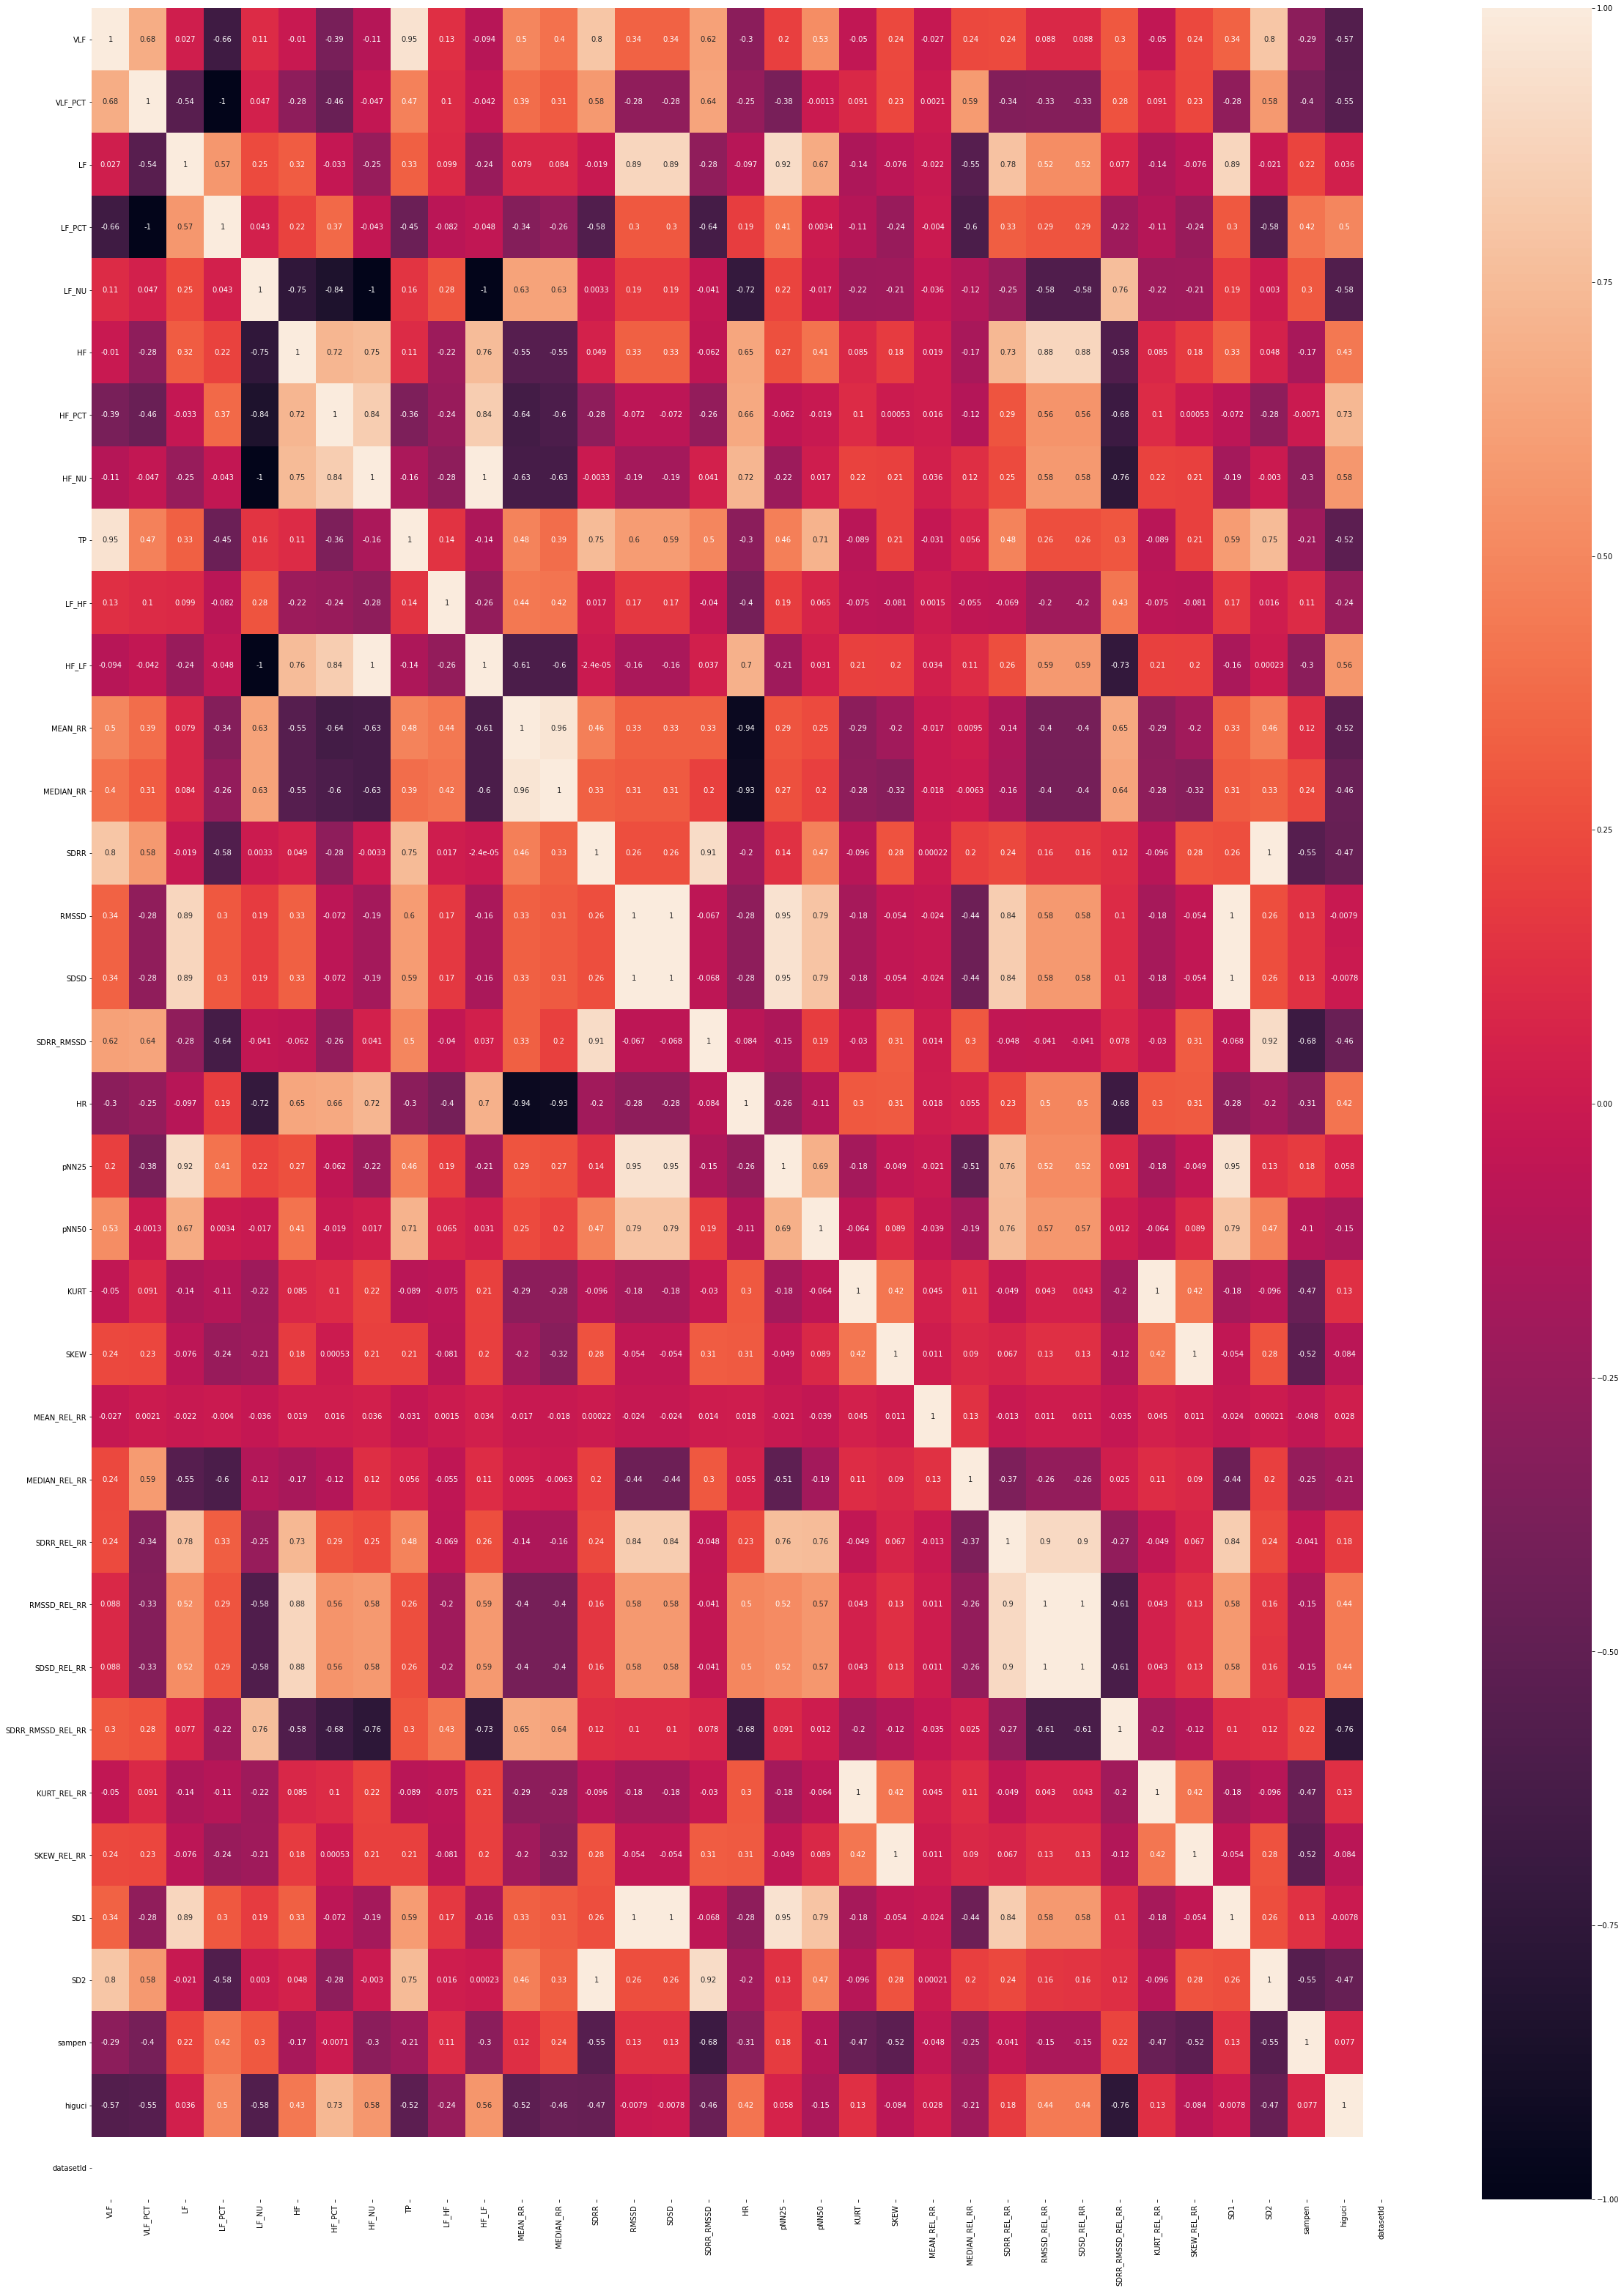

In [112]:

plt.figure(figsize=(40,55))  
sns.heatmap(train_data_corr, annot=True)

In [113]:
#just checking value count 
train_dateset['condition'].value_counts()

no stress        200082
interruption     105150
time pressure     64057
Name: condition, dtype: int64

In [98]:
#just checking value count 
train_dateset['datasetId'].value_counts()

2    369289
Name: datasetId, dtype: int64

**I have to exclude this column datasetId**

# Train Dataset: Standardization, dummy variables etc

In [163]:
# I feel the HR(heart rate) is the target column
train_target = train_dateset[['HR']]
train_dateset = train_dateset.drop(['HR','datasetId','uuid'], axis=1)


In [164]:
train_target.sample(5)

,HR
291381,71.652440
71258,82.613887
26445,64.479666
59285,68.793485
9535,80.105319


In [165]:
cat_train_dateset = train_dateset['condition'].copy()
cat_train_dateset.head()

0       no stress
1    interruption
2    interruption
3       no stress
4       no stress
Name: condition, dtype: object

In [166]:
cat_train_dateset = pd.get_dummies(cat_train_dateset)
cat_train_dateset.head()

,interruption,no stress,time pressure
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [167]:
num_train_dateset = train_dateset.drop('condition', axis=1)


In [168]:
#Standardizing the numeric columns
standardScaler = StandardScaler()
num_train_dateset = pd.DataFrame(standardScaler.fit_transform(num_train_dateset),
              columns=num_train_dateset.columns, index=num_train_dateset.index)

num_train_dateset.describe()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci
count,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05,3.692890e+05
mean,2.100010e-16,-1.213068e-16,1.154215e-16,-5.093487e-16,3.114718e-15,-2.767349e-16,-1.155974e-16,-1.001764e-16,1.569673e-16,-4.237868e-18,-3.495736e-16,-9.200370e-16,1.147449e-15,2.734979e-16,-2.157679e-17,4.033792e-16,-2.874138e-16,1.142304e-16,2.162035e-16,6.641364e-17,-5.082917e-17,-1.479537e-17,1.788604e-16,5.421152e-16,1.623899e-16,-1.043379e-16,1.092376e-15,6.641364e-17,-5.082917e-17,3.187809e-16,-2.439695e-16,-7.482098e-16,3.328865e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.123545e+00,-2.697974e+00,-1.491684e+00,-1.990619e+00,-6.229784e+00,-8.631024e-01,-9.161623e-01,-1.072052e+00,-1.459873e+00,-3.149668e-01,-9.825203e-01,-2.400873e+00,-2.453677e+00,-1.064858e+00,-2.292721e+00,-2.292570e+00,-9.207571e-01,-1.200789e+00,-8.745830e-01,-1.350608e+00,-3.113426e+00,-7.558071e+00,-4.564628e+00,-1.757006e+00,-1.663368e+00,-1.663367e+00,-2.228253e+00,-1.350608e+00,-3.113426e+00,-2.292570e+00,-1.061383e+00,-7.864278e+00,-2.384676e+00
25%,-6.599901e-01,-6.783599e-01,-6.985390e-01,-7.349781e-01,-4.658784e-01,-6.283269e-01,-7.204559e-01,-7.773341e-01,-7.056941e-01,-2.805555e-01,-7.326129e-01,-6.935708e-01,-6.515615e-01,-5.854343e-01,-7.635822e-01,-7.634743e-01,-5.549759e-01,-7.533926e-01,-8.745830e-01,-4.893008e-01,-5.731332e-01,-4.358854e-01,-5.209239e-01,-7.899912e-01,-6.974838e-01,-6.974798e-01,-6.838367e-01,-4.893008e-01,-5.731332e-01,-7.634743e-01,-5.848868e-01,-1.424847e-01,-6.811738e-01
50%,-2.928106e-01,1.228624e-01,-2.853052e-01,-1.276884e-01,2.610547e-01,-3.172697e-01,-3.271096e-01,-2.610547e-01,-2.020042e-01,-2.416138e-01,-2.796842e-01,-1.901921e-01,-1.683506e-01,-3.468018e-01,-1.362808e-01,-1.362318e-01,-2.808190e-01,-2.734581e-01,-4.032919e-01,-2.695004e-01,-1.466629e-01,5.051420e-03,1.770047e-01,-2.296295e-01,-2.593570e-01,-2.593621e-01,-1.926369e-01,-2.695004e-01,-1.466629e-01,-1.362318e-01,-3.476954e-01,3.465847e-01,-1.286313e-01
75%,2.503294e-01,7.472980e-01,4.439479e-01,6.578402e-01,7.773341e-01,1.327516e-01,3.574752e-01,4.658784e-01,4.507555e-01,-9.850943e-02,3.929596e-01,6.217090e-01,5.657135e-01,1.152078e-01,7.158014e-01,7.154190e-01,1.017227e-01,4.261074e-01,6.066178e-01,1.114857e-01,3.442201e-01,4.347377e-01,6.875896e-01,5.969673e-01,4.512072e-01,4.512076e-01,5.704873e-01,1.114857e-01,3.442201e-01,7.154190e-01,1.152867e-01,5.770941e-01,6.645242e-01
max,5.737726e+00,1.994037e+00,4.084180e+00,2.732726e+00,1.072052e+00,7.164094e+00,6.518813e+00,6.229784e+00,5.306363e+00,2.128410e+01,7.769137e+00,3.815026e+00,6.130224e+00,5.888908e+00,2.827628e+00,2.827784e+00,9.161924e+00,3.606690e+00,4.646257e+00,3.550424e+01,9.629696e+00,7.642089e+00,2.951388e+00,3.300096e+00,4.427820e+00,4.427825e+00,4.569226e+00,3.550424e+01,9.629696e+00,2.827784e+00,5.886906e+00,8.327093e-01,2.876998e+00


In [169]:
processed_train_dateset = pd.concat([num_train_dateset, cat_train_dateset], axis=1, sort=False)
processed_train_dateset.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci,interruption,no stress,time pressure
0,0.254610,0.471781,0.109234,-0.418915,0.707808,-0.522547,-0.678297,-0.707808,0.260661,-0.141218,-0.672759,0.309041,0.089161,0.410029,0.140024,0.139927,0.323990,0.157670,-0.335965,-0.770683,0.419702,-1.234344,0.329592,-0.273263,-0.444639,-0.444636,0.363248,-0.770683,0.419702,0.139927,0.411127,0.373348,-0.302406,0,1,0
1,0.063161,0.756281,-0.446586,-0.694567,1.001290,-0.818019,-0.877559,-1.001290,-0.093005,0.585608,-0.923073,0.744562,0.804046,-0.363536,-0.488516,-0.488398,-0.218559,-0.517493,-0.874583,-0.520249,-0.281499,-0.350090,1.240130,-0.842030,-1.265779,-1.265786,2.458566,-0.520249,-0.281499,-0.488398,-0.362229,0.541198,-1.569039,1,0,0
2,-0.454734,-0.783139,0.612522,0.887761,0.820630,-0.561157,-0.626270,-0.820630,-0.259708,-0.060125,-0.769711,0.413598,0.491540,-0.322307,0.322217,0.322393,-0.430496,0.393570,-0.672601,-0.095761,-0.998456,-0.056156,0.233261,-0.005791,-0.252957,-0.252953,0.319909,-0.095761,-0.998456,0.322393,-0.322797,0.352071,-0.096115,1,0,0
3,0.116081,0.351185,0.103543,-0.299551,0.644617,-0.463970,-0.616778,-0.644617,0.129556,-0.168069,-0.618056,0.281755,0.389161,-0.246146,0.180299,0.180379,-0.320385,0.239014,-0.739928,-0.574293,-0.611513,0.696325,1.105011,-0.148392,-0.267329,-0.267325,0.117524,-0.574293,-0.611513,0.180379,-0.246042,0.559758,-0.041875,0,1,0
4,-0.577387,-1.214372,0.827718,1.256025,0.279697,0.197587,0.127137,-0.279697,-0.293352,-0.239679,-0.296386,-0.297140,-0.232624,-0.604099,1.028043,1.028181,-0.802879,1.263959,-0.672601,-0.598568,-0.280021,-0.600321,-2.617391,0.943228,0.860676,0.860681,-0.506257,-0.598568,-0.280021,1.028181,-0.608781,0.766427,1.082438,0,1,0


# Test Dataset: Standardization, dummy variables etc

In [123]:
test_dateset.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'MEAN_RR', 'MEDIAN_RR', 'SDRR',
       'RMSSD', 'SDSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'SD1',
       'SD2', 'sampen', 'higuci', 'datasetId', 'condition'],
      dtype='object')

In [124]:
test_dateset.shape

(41033, 36)

In [126]:
train_dateset.shape

(369289, 37)

In [190]:
test_dateset_features = test_dateset.drop(['datasetId','uuid'], axis=1)

In [191]:
cat_test_dateset_features = test_dateset_features['condition'].copy()
cat_test_dateset_features.head()

0    time pressure
1        no stress
2        no stress
3    time pressure
4     interruption
Name: condition, dtype: object

In [192]:
cat_test_dateset_features = pd.get_dummies(cat_test_dateset_features)
cat_test_dateset_features.head()

,interruption,no stress,time pressure
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0


In [193]:
num_test_dateset = test_dateset_features.drop('condition', axis=1)

In [194]:
standardScaler = StandardScaler()
num_test_dateset = pd.DataFrame(standardScaler.fit_transform(num_test_dateset),
              columns=num_test_dateset.columns, index=num_test_dateset.index)

num_test_dateset.describe()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci
count,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04,4.103300e+04
mean,9.541592e-17,4.240726e-16,-1.791582e-16,4.894175e-17,-1.356145e-15,-7.522882e-17,1.202798e-16,-8.373278e-17,-6.264063e-17,-4.378878e-17,-4.626718e-17,9.873092e-16,-5.842822e-16,-3.650508e-17,8.515326e-17,-3.639848e-16,-6.723623e-17,3.507918e-17,-4.288102e-16,5.555580e-17,6.609984e-18,4.207879e-17,-1.477235e-17,4.062868e-16,1.871575e-16,-2.078695e-16,1.420105e-16,5.555580e-17,6.609984e-18,1.647058e-16,5.741460e-18,-6.941701e-17,7.042190e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.121387e+00,-2.667754e+00,-1.482816e+00,-1.987188e+00,-6.071068e+00,-8.656606e-01,-9.188665e-01,-1.072727e+00,-1.458922e+00,-3.118475e-01,-9.851100e-01,-2.406125e+00,-2.461228e+00,-1.064188e+00,-2.285054e+00,-2.284888e+00,-9.141550e-01,-1.196789e+00,-8.741162e-01,-1.348049e+00,-3.141256e+00,-7.869966e+00,-4.576154e+00,-1.756373e+00,-1.664980e+00,-1.664982e+00,-2.177666e+00,-1.348049e+00,-3.141256e+00,-2.284888e+00,-1.060675e+00,-7.848378e+00,-2.371988e+00
25%,-6.618887e-01,-6.829293e-01,-6.999631e-01,-7.369269e-01,-4.698561e-01,-6.325356e-01,-7.269223e-01,-7.820707e-01,-7.087723e-01,-2.782637e-01,-7.380697e-01,-6.949721e-01,-6.548692e-01,-5.838532e-01,-7.624589e-01,-7.623395e-01,-5.541168e-01,-7.610802e-01,-8.741162e-01,-4.873330e-01,-5.709778e-01,-4.325340e-01,-5.216224e-01,-7.932559e-01,-6.996395e-01,-6.996499e-01,-6.806306e-01,-4.873330e-01,-5.709778e-01,-7.623395e-01,-5.831575e-01,-1.381311e-01,-6.814536e-01
50%,-2.927479e-01,1.199211e-01,-2.864522e-01,-1.239580e-01,2.612026e-01,-3.190948e-01,-3.294461e-01,-2.612026e-01,-2.001167e-01,-2.398107e-01,-2.801163e-01,-1.948601e-01,-1.703968e-01,-3.413252e-01,-1.348105e-01,-1.346752e-01,-2.788553e-01,-2.769592e-01,-4.011890e-01,-2.684746e-01,-1.424763e-01,1.599894e-03,1.802890e-01,-2.304089e-01,-2.554270e-01,-2.554230e-01,-1.911332e-01,-2.684746e-01,-1.424763e-01,-1.346752e-01,-3.424538e-01,3.448916e-01,-1.308362e-01
75%,2.542106e-01,7.497899e-01,4.527575e-01,6.573326e-01,7.820707e-01,1.331927e-01,3.576885e-01,4.698561e-01,4.529030e-01,-9.567716e-02,3.978825e-01,6.284890e-01,5.748980e-01,1.170406e-01,7.200609e-01,7.200117e-01,1.043472e-01,4.169476e-01,5.446654e-01,1.063644e-01,3.486325e-01,4.322414e-01,6.864086e-01,6.013201e-01,4.530516e-01,4.530521e-01,5.628914e-01,1.063644e-01,3.486325e-01,7.200117e-01,1.174463e-01,5.725235e-01,6.671197e-01
max,5.636013e+00,1.990656e+00,4.054755e+00,2.691931e+00,1.072727e+00,7.153565e+00,6.555661e+00,6.071068e+00,5.232687e+00,2.062629e+01,7.501581e+00,3.815603e+00,6.145192e+00,5.929878e+00,2.798552e+00,2.798698e+00,9.146132e+00,3.571803e+00,4.598327e+00,3.020837e+01,9.522174e+00,7.478748e+00,2.944966e+00,3.304742e+00,4.418591e+00,4.418594e+00,4.499351e+00,3.020837e+01,9.522174e+00,2.798698e+00,5.927823e+00,8.245619e-01,2.847684e+00


In [195]:
processed_test_dateset = pd.concat([num_test_dateset, cat_test_dateset_features], axis=1, sort=False)
processed_test_dateset.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci,interruption,no stress,time pressure
0,-0.180651,0.729908,-0.655013,-0.670703,0.948685,-0.800531,-0.850120,-0.948685,-0.385830,0.199605,-0.880406,0.705741,0.734375,-0.348782,-0.770174,-0.769996,-0.079551,-0.720737,-0.738994,-0.670233,-0.400379,0.099959,0.874270,-1.032491,-1.315621,-1.315619,2.165489,-0.670233,-0.400379,-0.769996,-0.346849,0.704120,-1.311071,0,0,1
1,-0.896694,-2.252038,1.047996,2.340531,0.468689,0.015174,0.128417,-0.468689,-0.531271,-0.212028,-0.464945,-0.239461,-0.195296,-0.696651,1.345525,1.345684,-0.907455,1.780555,-0.333628,-0.309826,-0.139153,0.249628,-2.637482,1.208364,1.088565,1.088562,-0.534311,-0.309826,-0.139153,1.345684,-0.704126,0.590695,1.727921,0,1,0
2,-0.052107,0.689836,-0.508612,-0.653765,0.546740,-0.543970,-0.620535,-0.546740,-0.214574,-0.195937,-0.533641,0.240359,0.394666,-0.263257,-0.274422,-0.274245,-0.187973,-0.341509,-0.333628,-0.406093,-0.914328,0.064373,0.341957,-0.555479,-0.396722,-0.396719,-0.270132,-0.406093,-0.914328,-0.274245,-0.262176,-0.058029,0.704495,0,1,0
3,1.961771,1.564399,-0.616444,-1.542476,0.787696,-0.709407,-0.856399,-0.787696,1.649698,-0.091277,-0.742907,1.541415,1.188118,1.369029,0.354574,0.354170,1.091530,0.110338,1.017593,-0.748444,0.636937,-1.469479,0.004734,-0.307937,-0.541235,-0.541232,0.575273,-0.748444,0.636937,0.354170,1.369913,0.083416,-1.560276,0,0,1
4,-0.678566,0.358449,-0.993948,-0.426080,-0.921862,-0.123201,0.472156,0.921862,-0.941615,-0.287959,0.839242,-0.581154,-0.478939,-0.747753,-1.139501,-1.139334,-0.456370,-0.954729,-0.806555,0.679582,-0.072031,0.331337,0.533948,-0.932272,-0.483581,-0.483583,-0.748784,0.679582,-0.072031,-1.139334,-0.745989,0.024683,1.118718,1,0,0


In [176]:
(processed_train_dateset.shape, processed_test_dateset.shape), (target.shape)

(((369289, 36), (41033, 36)), (369289, 1))

# Creating a Model

In [177]:
def build_model():

    model = tf.keras.Sequential([layers.Dense(32, input_shape = (processed_train_dateset.shape[1],), activation = 'relu'),
                                 layers.Dense(16, activation ='relu'),
                                 layers.Dense(4, activation ='relu'),
                                 layers.Dense(1)])

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

    model.compile(loss= 'mse', metrics= ['mae'], optimizer = optimizer)

    return model

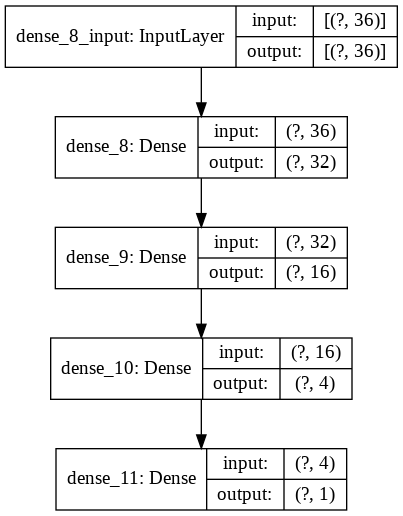

In [178]:
model = build_model()
tf.keras.utils.plot_model(model, show_shapes=True)

## Running the model by calling the fit method

In [180]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                1184      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 1,785
Trainable params: 1,785
Non-trainable params: 0
_________________________________________________________________


In [181]:
training_history = model.fit(processed_train_dateset, target, epochs=500, batch_size = 100)

Epoch 1/500
3693/3693 [==============================] - 7s 2ms/step - loss: 104.4420 - mae: 2.2346
Epoch 2/500
3693/3693 [==============================] - 7s 2ms/step - loss: 0.3445 - mae: 0.4305
Epoch 3/500
3693/3693 [==============================] - 7s 2ms/step - loss: 0.2140 - mae: 0.3369
Epoch 4/500
3693/3693 [==============================] - 8s 2ms/step - loss: 0.1516 - mae: 0.2821
Epoch 5/500
3693/3693 [==============================] - 8s 2ms/step - loss: 0.1178 - mae: 0.2491
Epoch 6/500
3693/3693 [==============================] - 7s 2ms/step - loss: 0.0907 - mae: 0.2180
Epoch 7/500
3693/3693 [==============================] - 7s 2ms/step - loss: 0.0782 - mae: 0.2018
Epoch 8/500
3693/3693 [==============================] - 7s 2ms/step - loss: 0.0692 - mae: 0.1892
Epoch 9/500
3693/3693 [==============================] - 7s 2ms/step - loss: 0.0584 - mae: 0.1725
Epoch 10/500
3693/3693 [==============================] - 7s 2ms/step - loss: 0.0510 - mae: 0.1620
Epoch 11/500
3693

#Making prediction

In [196]:
predict = model.predict(processed_test_dateset)

In [197]:
predict

array([[64.73549 ],
       [73.82791 ],
       [69.19383 ],
       ...,
       [60.96654 ],
       [77.487656],
       [76.68665 ]], dtype=float32)

In [198]:
test_dateset['HR'] = predict.tolist()

In [199]:
test_dateset.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci,datasetId,condition,HR
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,0.005245,934.665288,939.03173,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075,8.347898,115.862444,2.209659,1.100715,2,time pressure,[64.73548889160156]
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,0.025544,817.062380,816.33879,55.492332,20.558810,20.558768,2.699200,24.600000,0.533333,-0.034454,-0.051689,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689,14.542096,77.118903,2.186132,1.290615,2,no stress,[73.82791137695312]
2,cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,0.022188,876.762022,894.19889,88.690820,13.853737,13.853730,6.401942,7.066667,0.533333,-0.206953,-0.589940,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940,9.799336,125.044377,2.051571,1.226663,2,no stress,[69.19383239746094]
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,0.011963,1038.640693,998.91429,213.725850,16.457194,16.454801,12.986774,10.800000,1.866667,-0.820407,0.487198,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198,11.639185,302.029812,2.080910,1.085143,2,time pressure,[60.240394592285156]
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,0.089265,774.548508,778.90508,51.577855,10.273114,10.273049,5.020664,2.000000,0.066667,1.738453,-0.005082,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082,7.266567,72.579248,2.068728,1.252547,2,interruption,[77.8125]


# Creating Submission dataframe and exporting it to csv

In [200]:
pred_results = pd.DataFrame({'uuid': test_dateset.uuid.values.flatten(),
                             'HR': predict.flatten()}, index=range(len(predict)))

pred_results.sample(10)

,uuid,HR
31111,7d496af7-0bbc-4c36-a360-03823017d40c,83.755417
2014,f571990b-6414-45a8-a580-b5c05214df4d,58.612419
22213,7acea677-2629-405b-94fc-59c1d8b26977,73.027267
9342,176ce174-ffce-44c1-84e1-725a17ae9d98,81.727882
20423,05ed8c20-4160-4602-98ac-9d384cddca08,76.631638
12031,8d5cca94-af5b-46bd-af55-d700df7b45d3,70.840843
13624,f8c6928c-c1e3-4bf4-b341-9a634e7974be,90.843208
28975,a9b19625-c2ee-45ae-b5d0-2e76164a1a3a,67.228462
28277,e27b0be7-f60d-483c-a8ce-7183d66a1f7f,60.337002
14884,ec7f7045-522c-4754-ab6d-8803bad8f278,79.929939


In [201]:
pred_results.to_csv('/content/drive/MyDrive/Hackathons/Test/submission.csv', index = True, header=True) 